<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Замена-типа-данных" data-toc-modified-id="Замена-типа-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Замена типа данных</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li><li><span><a href="#Категориальные-переменные" data-toc-modified-id="Категориальные-переменные-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Категориальные переменные</a></span></li><li><span><a href="#Количественные-переменные" data-toc-modified-id="Количественные-переменные-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Количественные переменные</a></span></li><li><span><a href="#Обогащение-таблицы" data-toc-modified-id="Обогащение-таблицы-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Обогащение таблицы</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-фильмов,-получивших-государственную-поддержку" data-toc-modified-id="Анализ-фильмов,-получивших-государственную-поддержку-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ фильмов, получивших государственную поддержку</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование данных о российском кинопрокате
## Описание проекта

Цель данного исследования - изучение рынка российского кинопроката и выявление текущих трендов, а также анализ фильмов, получивших государственную поддержку.
Источник информации - данные, опубликованные на портале открытых данных Министерства культуры Российской Федерации. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Загрузка данных

Импортируем библиотеки:

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.float_format', '{:,.2f}'.format)

Прочитаем файлы из папки /datasets и сохраним их в переменных `df` и `box_office`. Выведем на экран первые 5 строк таблиц:

In [102]:
df = pd.read_csv('/datasets/mkrf_movies.csv')
box_office = pd.read_csv('/datasets/mkrf_shows.csv')

display(df.head())
display(box_office.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Изучим общую информацию о таблицах:

In [103]:
df.info()
print('\n')
box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В таблице `df` 15 столбцов, согласно документации к данным:
- `title` — название фильма;
- `puNumber` — номер прокатного удостоверения;
- `show_start_date` — дата премьеры фильма;
- `type` — тип фильма;
- `film_studio` — студия-производитель;
- `production_country` — страна-производитель;
- `director` — режиссёр;
- `producer` — продюсер;
- `age_restriction` — возрастная категория;
- `refundable_support` — объём возвратных средств государственной поддержки;
- `nonrefundable_support` — объём невозвратных средств государственной поддержки;
- `financing_source` — источник государственного финансирования;
- `budget` — общий бюджет фильма;
- `ratings` — рейтинг фильма на КиноПоиске;
- `genres` — жанр фильма.

В таблице `box_office` всего 2 столбца:
- `puNumber` — номер прокатного удостоверения;
- `box_office` — сборы в рублях.

Название столбца `puNumber` не соответсвует единому стилю названий столбцов, исправим его:

In [104]:
df = df.rename(columns={'puNumber':'pu_number'})
box_office = box_office.rename(columns={'puNumber':'pu_number'})

## Предобработка данных

### Замена типа данных

Первичным ключом, по которому можно объединить две таблицы является номер прокатного удостоверения `pu_number`, но в таблице **df** это поле имеет строчный тип данных. Изменим тип данных на числовой:

In [105]:
df['pu_number'] = pd.to_numeric(df['pu_number'], errors='coerce')

Теперь объеденим обе таблицы при помощи **merge**:

In [106]:
df = df.merge(box_office, on='pu_number', how='left')

Теперь данные из двух таблиц объединены в одну.

### Обработка пропусков

Посчитаем количество и долю пропусков в таблице:

In [107]:
pd.concat([df.isna().sum(), df.isna().mean().apply(lambda x: '{0:.1f}%'.format(x * 100))], 
          axis=1).rename(columns={0:'количество пропусков', 1:'доля пропусков'})

,количество пропусков,доля пропусков
title,0,0.0%
pu_number,1,0.0%
show_start_date,0,0.0%
type,0,0.0%
film_studio,18,0.2%
production_country,2,0.0%
director,9,0.1%
producer,568,7.6%
age_restriction,0,0.0%
refundable_support,7154,95.6%


В таблице имеются пропуски, часть столбов практически полностью не заполнена. Релевантные данные для заполнения  пропусков отсутствуют, поэтому оставим их как есть. Проверим, для какого количества фильмов с господдержкой остуствуют данных по сборам:

In [108]:
df[df['budget'].notna()]['box_office'].isna().sum()

14

Таких фильмов не так много.

### Обработка дубликатов

Посчитаем количество явных дубликатов в таблице:

In [109]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


Явные дубликаты в таблице отсутствуют.

### Категориальные переменные

Заменим все пропуски в категориальных переменных на 'unknown':

In [110]:
columns = ['title', 'type', 'film_studio','production_country', 
           'director', 'producer', 'age_restriction','financing_source', 'genres',]

for column in columns:  #  используем цикл по столбцам
    df[columns] = df[columns].fillna('unknown')

Более подробно изучим столбцы с категориальными переменными:

In [111]:
columns = ['type','production_country', 
           'director', 'producer', 'age_restriction',
           'financing_source', 'genres']

for column in columns:  #  используем цикл по столбцам
    display(pd.DataFrame(df[column].value_counts().head(5)))

,type
Художественный,4520
Художественный,1389
Анимационный,828
Прочие,406
Документальный,288


,production_country
США,2172
Россия,1821
СССР,347
Франция,301
Великобритания,257


,director
О.Семёнова,47
Стивен Содерберг,17
Д.Червяцов,17
Ридли Скотт,16
Тиль Швайгер,14


,producer
unknown,568
П.Смирнов,67
"Олег Кузовков, Дмитрий Ловейко, Марина Ратина",28
С.Сельянов,18
"Д.Ловейко, О.Кузовков",17


,age_restriction
«16+» - для детей старше 16 лет,2851
«18+» - запрещено для детей,1605
«12+» - для детей старше 12 лет,1593
«0+» - для любой зрительской аудитории,811
«6+» - для детей старше 6 лет,626


,financing_source
unknown,7154
Министерство культуры,164
Фонд кино,146
"Министерство культуры, Фонд кино",22


,genres
unknown,976
драма,476
комедия,352
"мелодрама,комедия",222
"драма,мелодрама,комедия",189


В столбце `type` видны дублирующиеся наименования типов фильмов:

In [112]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Для приведения наименований в единый формат уберем все лишние пробелы в начале и в конце строки: 

In [113]:
for column in columns:
    df[column] = df[column].str.strip()

### Количественные переменные

Изучим столбцы с количественными переменными:

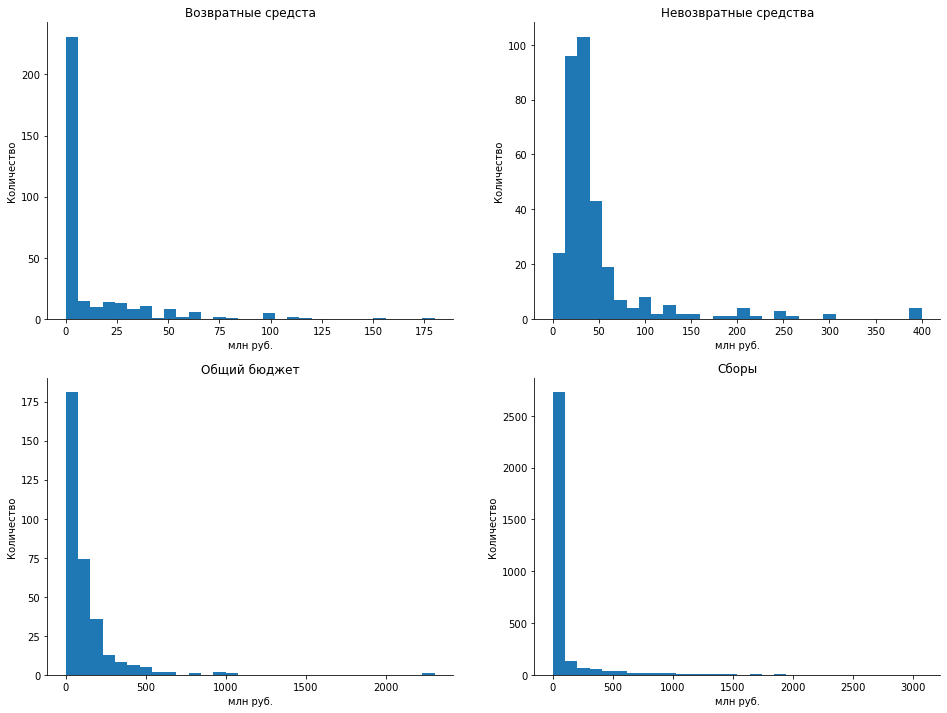

In [114]:
columns=['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
name={'refundable_support':'Возвратные средста', 'nonrefundable_support':'Невозвратные средства',
      'budget':'Общий бюджет', 'box_office':'Сборы'}

counter = 0
plt.figure(figsize=(16,12))
for column in columns:
    counter += 1
    plt.subplot(2, 2, counter)
    plt.hist(df[column]/10**6, bins=30)
    plt.xlabel('млн руб.')
    plt.ylabel('Количество')
    plt.title(name[column])
    sns.despine()

В количественных переменных наблюдается 1 выраженный пик и небольшое количество выбросов.
В столбце с данными об общем бюджете фильма есть нулевые значения, что является ошибкой, т.к. согласно документации к данным столбец `budget` включает в себя общий бюджет фильма:

In [115]:
pd.DataFrame(df[df['budget'] == 0][['title','budget','refundable_support','nonrefundable_support']]).reset_index(drop=True)

,title,budget,refundable_support,nonrefundable_support
0,14+,0.00,0.00,"23,000,000.00"
1,Дуxless 2,0.00,0.00,"75,000,000.00"
2,Воин (2015),0.00,"10,000,000.00","70,000,000.00"
3,Бармен.,0.00,"20,000,000.00",0.00
4,Савва. Сердце воина,0.00,"60,000,000.00","100,000,000.00"
5,Тряпичный союз,0.00,0.00,"59,000,000.00"
6,Срочно выйду замуж,0.00,0.00,"35,000,000.00"
7,Помню - не помню!,0.00,0.00,"6,000,000.00"
8,Любовь с ограничениями,0.00,"19,000,000.00","51,000,000.00"
9,Притяжение (2016),0.00,0.00,"250,000,000.00"


Изучим более подробно рейтинги:

In [116]:
df['ratings'].value_counts()

6.6    312
6.7    308
6.8    261
7.2    252
6.2    243
      ... 
19%      1
90%      1
62%      1
64%      1
9.1      1
Name: ratings, Length: 94, dtype: int64

В столбце данные записаны в разных форматах, в числовом и в процентном. На КиноПоиске рейтинг в процентном формате это рейтинг ожидания. Приведем данные в единый формат:

In [117]:
df['ratings'] = np.where(df['ratings'].str.contains('%', na=False), 
                         df['ratings'].str.strip('%').astype('float') / 10, df['ratings'])
df['ratings'] = df['ratings'].astype(float)

Изучим распределение рейтинга фильмов:

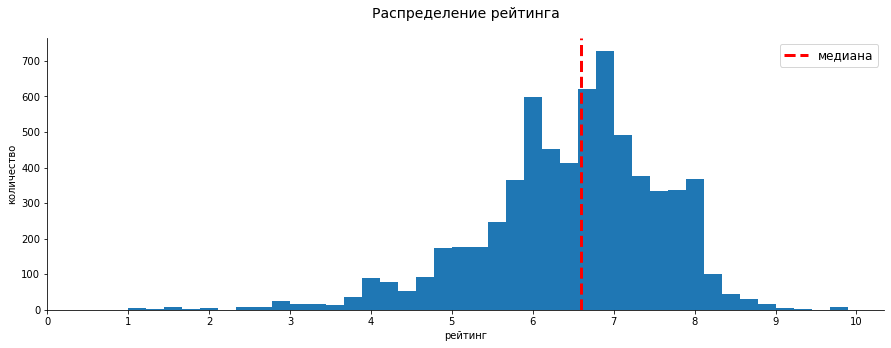

In [118]:
plt.figure(figsize=(15, 5))
plt.hist(df['ratings'], bins=40)
plt.axvline(x=df['ratings'].median(), linewidth=3, color='r', linestyle='--', label='медиана', alpha=1)
plt.title('Распределение рейтинга', fontsize=14, pad=20)   
plt.xlabel('рейтинг')
plt.ylabel('количество')
plt.xticks(np.arange(0, 11, 1))
plt.legend(prop={'size':12})
sns.despine()

Медианным значением рейтинга является 6,5.

### Обогащение таблицы

Добавим в таблицу столбец `year_release` с информацией о годе выхода фильма в прокат, предварительно скорректировав тип данных в столбце `show_start_date` в формат даты:

In [119]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
df['year_release'] = df['show_start_date'].dt.year

Создадим столбец `first_director` с именем и фамилией главного режиссёра фильма и столбец `main_genre` с основным жанром фильма:

In [120]:
df['first_director'] = df['director'].str.split(',').str[0]
df['main_genre'] = df['genres'].str.split(',').str[0]

## Исследовательский анализ данных

Добавим столбец `roi` с окупаемостью фильма:

In [121]:
pd.set_option('chained_assignment', None)
df['roi'] = (df['box_office'] - df['budget']) / df['budget']

Рассчитаем долю окупившихся от общего числа вышедших в прокат фильмов в разбивке по году выхода:

In [122]:
def roi_positive(row):
    if row['roi'] > 0:
        return 1
    else:
        return 0
    
df['roi_positive'] = df.apply(roi_positive, axis=1)

report = df[(df['budget'].notna()) & (df['budget'] > 0) & (df['box_office'].notna())]

(
pd.DataFrame(report.groupby('year_release')['roi_positive'].mean().apply(lambda x: '{0:.1f}%'.format(x * 100))
             .reset_index()).sort_values(by='year_release', ascending=True).head(10)
    .rename(columns={'year_release':'год', 'roi_positive':'доля окупившихся фильмов'})    
)

,год,доля окупившихся фильмов
0,2013,0.0%
1,2014,20.0%
2,2015,16.5%
3,2016,15.8%
4,2017,35.1%
5,2018,32.7%
6,2019,18.6%


Изучим, какое количество фильмов выходило в прокат в различные годы:

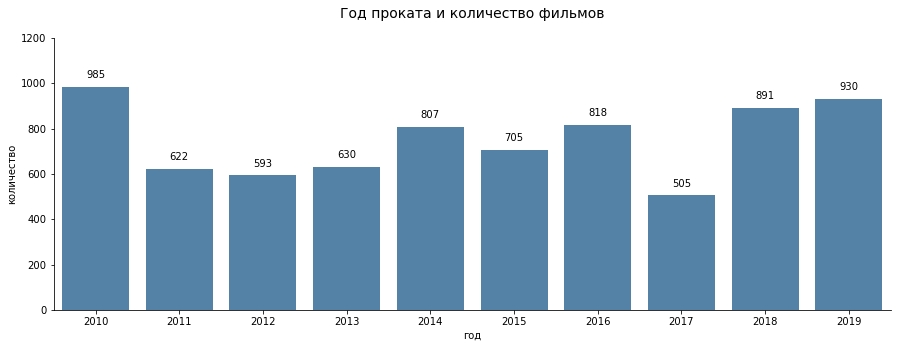

In [123]:
report = (
df.pivot_table(index='year_release', values='title', aggfunc='count').sort_values(by='year_release')
    .reset_index().rename(columns={'year_release':'год','title':'кол-во'})
)
    
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='год', y='кол-во', data=report, color='steelblue')
plt.title('Год проката и количество фильмов', fontsize=14, pad=20)   
plt.xlabel('год')
plt.ylabel('количество')
ax.set_ylim([0, 1200])

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 40
    ax.annotate('{:.0f}'.format(report.iloc[i, 1]), (x, y), ha='center')

sns.despine()

Наибольшее количество фильмов приходится на 2010 год - в этот год в прокат вышло 985 фильмов.

Изучим распределение фильмов по жанрам:

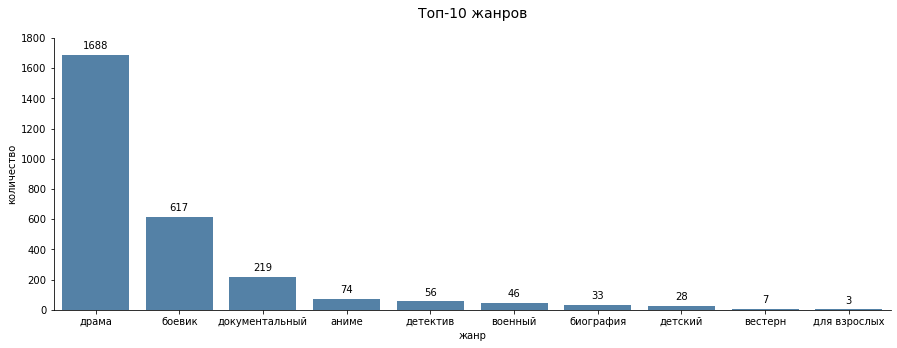

In [124]:
report = (
df[df['main_genre'] != 'unknown'].pivot_table(index='main_genre', values='title', aggfunc='count').head(10)
    .sort_values(by='title', ascending=False).reset_index().rename(columns={'main_genre':'жанр','title':'количество'})
)
    
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='жанр', y='количество', data=report, color='steelblue')
plt.title('Топ-10 жанров', fontsize=14, pad=20)   
plt.xlabel('жанр')
plt.ylabel('количество')
ax.set_ylim([0, 1800])

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 40
    ax.annotate('{:.0f}'.format(report.iloc[i, 1]), (x, y), ha='center')

sns.despine()

Самым крупным жанром по количеству фильмов, выходивших в прокат, является "Драма", далее идет "Боевик".

Далее проанализируем какие жанры имеют самые высокий рейтинг:

In [125]:
pd.DataFrame(df.pivot_table(index='main_genre', values='ratings', aggfunc='mean').
             sort_values(by='ratings', ascending=False).head(10)
.reset_index().rename(columns={'main_genre':'жанр', 'ratings':'рейтинг'})).fillna('')

,жанр,рейтинг
0,фильм-нуар,7.60
1,аниме,7.48
2,музыка,7.37
3,вестерн,7.30
4,документальный,7.24
5,спорт,7.14
6,биография,7.01
7,концерт,6.92
8,мюзикл,6.90
9,драма,6.77


Самые высокие рейтинги наблюдаются у жанров фильм-нуар и аниме.

Изучим топ-10 фильмов с самым высоким рейтингом:

In [126]:
(
pd.DataFrame(df.pivot_table(index=['title','production_country','main_genre'], values='ratings', 
                            aggfunc='mean').sort_values(by='ratings', ascending=False).head(10).reset_index().
             rename(columns=
                      {'title':'фильм', 'production_country':'страна','main_genre':'жанр', 'ratings':'рейтинг'})).fillna('')
)

,фильм,страна,жанр,рейтинг
0,Спираль.,Россия,аниме,9.90
1,Прошлое,Аргентина - Бразилия,ужасы,9.90
2,Животные рядом со Святыми,Россия,криминал,9.90
3,Сказка о добре и Вре,Россия,триллер,9.90
4,Колесо времени,Россия,фэнтези,9.80
5,ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ,Россия,фантастика,9.80
6,Круиз.,Россия,приключения,9.70
7,"Машины Страшилки. Серия ""Жутчайшая повесть о п...","Россия, Республика Кипр",мультфильм,9.70
8,Песочный человек,Швейцария,ужасы,9.70
9,Свинья,Иран,триллер,9.40


Сфорируем список топ-10 фильмов с самым низким рейтингом:

In [127]:
(
pd.DataFrame(df.pivot_table(index=['title','production_country','main_genre'], values='ratings', 
                            aggfunc='mean').sort_values(by='ratings', ascending=True).head(10).reset_index().
             rename(columns=
                    {'title':'фильм', 'production_country':'страна','main_genre':'жанр', 'ratings':'рейтинг'})).fillna('')
)

,фильм,страна,жанр,рейтинг
0,Взломать блогеров,Россия,комедия,1.00
1,Кавказ.,Азербайджан-Россия,комедия,1.10
2,Мантикора.,Россия,триллер,1.10
3,Приключения в тридесятом царстве.,Россия,детский,1.20
4,Кукарача 3D,Россия,мультфильм,1.30
5,Сказка. Есть,Россия,фэнтези,1.40
6,Большая Ржака,Россия,комедия,1.40
7,Зомби каникулы,Россия,ужасы,1.50
8,Черная роза,Россия,детектив,1.50
9,Дизлайк,Россия,ужасы,1.50


Почти все фильмы из топ-10 худших по рейтингу были сняты в России.

Изучим динамику сборов по годам:

,год,сборы
0,2010,"2,428,654.00"
1,2011,"14,102,765.00"
2,2012,"6,955,423.00"
3,2013,"29,799,706.20"
4,2014,"7,444,951,859.20"
5,2015,"39,497,365,196.40"
6,2016,"47,866,299,741.91"
7,2017,"48,563,707,217.51"
8,2018,"49,668,403,134.32"
9,2019,"48,425,708,779.59"


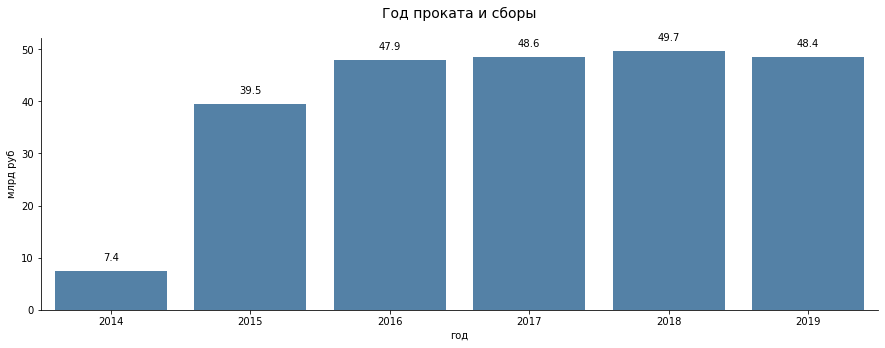

In [128]:
report = (
df.pivot_table(index='year_release', values='box_office', aggfunc='sum').sort_values(by='year_release')
    .reset_index().rename(columns={'year_release':'год','box_office':'сборы'})    
)

report['сборы'] = report['сборы'].apply(lambda x: x/10**9)
report = report[(report['год'] >= 2014) & (report['год'] <= 2019)]


plt.figure(figsize=(15, 5))
ax = sns.barplot(x='год', y='сборы', data=report, color='steelblue')
plt.title('Год проката и сборы', fontsize=14, pad=20)   
plt.xlabel('год')
plt.ylabel('млрд руб')


patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 2
    ax.annotate('{:.1f}'.format(report.iloc[i, 1]), (x, y), ha='center')

sns.despine()


pd.DataFrame(df.pivot_table(index='year_release', values='box_office', aggfunc='sum').sort_values(by='year_release')
.reset_index().rename(columns={'year_release':'год','box_office':'сборы'}))

Минимальные сборы были зафиксированы в 2014 г., а максимальные в 2018 г.

Вычислим среднюю и медианную сумму сборов по каждому году:

In [129]:
report = pd.DataFrame(df.pivot_table(index='year_release', values='box_office', 
                                     aggfunc=['mean','median']).sort_values(by='year_release').reset_index())

report.columns = ['год','средняя','медиана']
display(report)

,год,средняя,медиана
0,2010,"23,130.04","1,700.00"
1,2011,"129,383.17","3,000.00"
2,2012,"54,339.24","5,660.00"
3,2013,"161,954.92","3,522.50"
4,2014,"26,684,415.27","18,160.00"
5,2015,"84,940,570.31","4,920,933.00"
6,2016,"91,000,569.85","3,846,679.41"
7,2017,"136,032,793.33","9,968,340.00"
8,2018,"104,565,059.23","8,891,102.21"
9,2019,"91,369,261.85","4,627,798.34"


Наибольшие средние и медианные сборы были в 2017 году. 

Определим, влияет ли возрастное ограничение аудитории на сборы фильма:

year_release,возрастное ограничение,2015,2016,2017,2018,2019
0,«0+» - для любой зрительской аудитории,"379,054,578.37","150,228,848.67","229,598,930.00","32,449,002.11","17,746,066.82"
1,«12+» - для детей старше 12 лет,"13,616,082,008.91","12,204,446,524.39","7,851,427,660.67","14,267,291,660.69","12,680,198,773.67"
2,«16+» - для детей старше 16 лет,"11,368,120,870.27","16,664,548,541.74","18,745,042,900.06","16,503,602,346.96","12,753,418,984.60"
3,«18+» - запрещено для детей,"5,432,308,367.44","6,793,929,818.87","9,651,495,581.02","8,760,085,501.15","10,121,796,303.64"
4,«6+» - для детей старше 6 лет,"8,701,799,371.41","12,053,146,008.24","12,086,142,145.76","10,104,974,623.41","12,852,548,650.86"


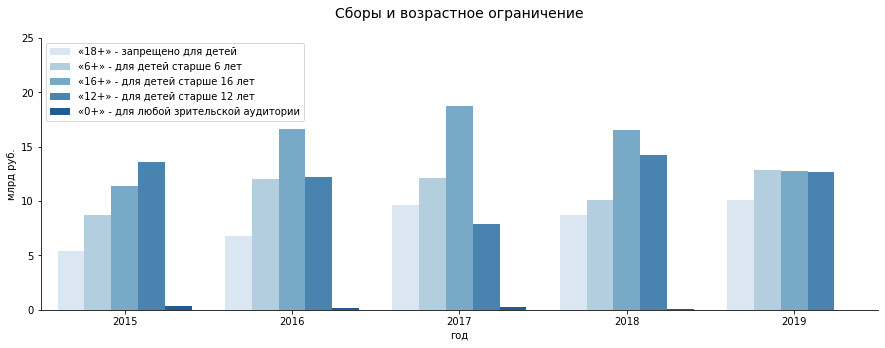

In [130]:
report = df[(df['year_release'] >= 2015) & (df['year_release'] <= 2019)]
report['box_office'] = report['box_office'].apply(lambda x: x/10**9)

plt.figure(figsize=(15,5))
ax = sns.barplot(x='year_release', y='box_office', hue='age_restriction', data=report, estimator=sum, palette='Blues', ci=None)
plt.title('Сборы и возрастное ограничение', fontsize=14, pad=20)  
plt.xlabel('год')
plt.ylabel('млрд руб.')
ax.set_ylim([0, 25])
plt.legend(loc=2)
sns.despine()

(
pd.DataFrame(df[(df['year_release'] >= 2015) & (df['year_release'] <= 2019)].pivot_table(index='age_restriction', 
columns='year_release', values='box_office', aggfunc='sum').reset_index().
             rename(columns={'age_restriction':'возрастное ограничение','All':'Итого'}))
)

Больше всего в прокате за период 2015-2019 г. собирали фильмы для возрастной аудитории «16+».

Изучим более подробно топ-10 самых прибыльных фильмов:

In [131]:
report = df[(df['budget'].notna()) & (df['budget'] > 0) & (df['box_office'].notna())]

report = (
    pd.DataFrame(report.groupby(['title','year_release','ratings'])[['roi','box_office']].sum().sort_values(by='roi', 
    ascending=False).reset_index().rename(columns={'title':'фильм', 'year_release':'год', 'ratings':'рейтинг', 
                                                   'box_office':'сборы'}))
)

display(report.head(10))

,фильм,год,рейтинг,roi,сборы
0,Холоп,2019,6.80,18.21,"3,073,568,690.79"
1,Я худею,2018,6.90,6.23,"633,462,266.74"
2,"Гуляй, Вася !",2016,6.50,5.64,"259,099,078.00"
3,Самый Лучший День,2015,4.70,4.23,"683,029,061.40"
4,8 новых свиданий,2014,6.00,4.08,"393,344,626.30"
5,Ёлки Новые,2017,5.80,3.91,"855,451,052.00"
6,Непрощенный,2018,6.70,3.77,"393,279,629.43"
7,Движение вверх,2017,7.50,3.71,"2,779,686,144.00"
8,Последний богатырь,2017,6.80,3.70,"1,655,037,688.00"
9,Три богатыря и принцесса Египта,2017,5.50,3.35,"759,226,773.00"


Самым прибыльным оказался фильм 2019 года "Холоп", собравший в прокате более 3 млрд руб.

Рассмотрим 10 наиболее убыточных фильмов:

In [132]:
display(report.tail(10))

,фильм,год,рейтинг,roi,сборы
277,Экспириенс,2015,4.70,-1.00,"36,550.00"
278,Трагедия в бухте Роджерс,2015,6.10,-1.00,"40,050.00"
279,Память осени,2016,5.70,-1.00,"58,500.00"
280,Сдается дом со всеми неудобствами,2016,5.80,-1.00,"55,800.00"
281,ВСЯ НАША НАДЕЖДА...,2016,7.20,-1.00,"35,897.00"
282,Простая история .,2016,7.80,-1.00,"58,720.00"
283,Вдвоем на льдине.,2015,6.60,-1.00,"4,450.00"
284,Битва с экстрасенсами,2015,5.40,-1.00,"6,000.00"
285,День До,2016,4.80,-1.00,"9,000.00"
286,Я-Учитель,2015,7.40,-1.00,"1,550.00"


Самый убыточный фильм собрал в прокате лишь 1550 руб.

Рассмотрим самые кассовые фильмы года:

In [133]:
report = (
pd.DataFrame(df.loc[df.groupby('year_release')['box_office'].idxmax()][['year_release', 'title', 'ratings', 'box_office']]).
    reset_index(drop=True).rename(columns=
                                  {'year_release':'год', 'title':'фильм', 'ratings':'рейтинг', 'box_office':'сборы'})  
)

display(report.tail(6))

,год,фильм,рейтинг,сборы
4,2014,Седьмой сын,5.80,"1,016,410,635.30"
5,2015,Звёздные войны: Пробуждение силы,7.10,"1,658,861,425.50"
6,2016,Зверополис,8.30,"2,048,126,108.00"
7,2017,Движение вверх,7.50,"2,779,686,144.00"
8,2018,Т-34,6.50,"2,271,754,004.52"
9,2019,Холоп,6.80,"3,073,568,690.79"


Рассчитаем окупаемость фильмов в разбивке по году выхода в прокат:

In [134]:
report = df[(df['budget'].notna()) & (df['budget'] > 0) & (df['box_office'].notna())]

def roi(row):
    return ((row['box_office'].sum() - row['budget'].sum()) / row['budget'].sum())

pd.DataFrame(report.groupby('year_release').apply(roi).reset_index().rename(columns={'year_release':'год', 0:'roi'}))

,год,roi
0,2013,-0.92
1,2014,-0.21
2,2015,-0.34
3,2016,-0.31
4,2017,0.57
5,2018,0.43
6,2019,-0.25


Наиболее успешным с точки зрениям окупаемости был период 2017-2018 гг. Фильмы, выходившие в прокат до или после, совокупно не окупились.

### Анализ фильмов, получивших государственную поддержку

Добавим столбец `is_funded` с информацией о наличии господдержки:

In [135]:
def is_funded(row):  
    total_support = row['refundable_support'] + row['nonrefundable_support'] 
    
    if total_support > 0:
        return 'с господдержкой'
    else:
        return 'без господдержки'

df['is_funded'] = df.apply(is_funded, axis=1)

Изучим, какую долю от общего бюджета фильма составляет государственная поддержка, построив гистограмму:

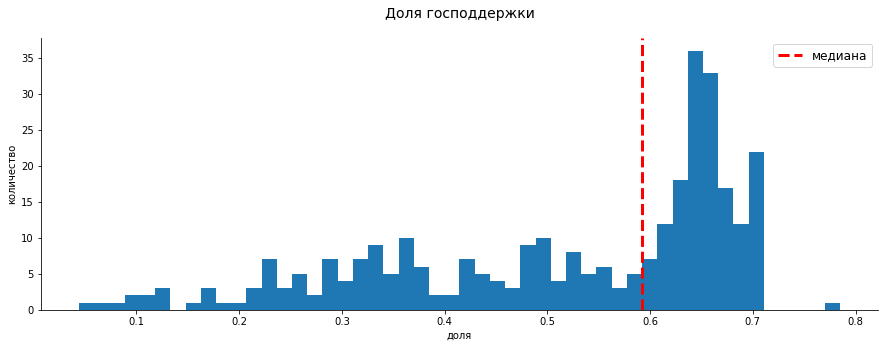

In [136]:
report = df[df['budget'].notna() & df['budget'] > 0 & (df['is_funded'] == 'с господдержкой')]
report['support_share'] = (report['refundable_support'] + report['nonrefundable_support']) / report['budget']

plt.figure(figsize=(15, 5))
plt.hist(report['support_share'], bins=50)
plt.axvline(x=report['support_share'].median(), linewidth=3, color='r', linestyle='--', label='медиана', alpha=1)
plt.title('Доля господдержки', fontsize=14, pad=20)   
plt.xlabel('доля')
plt.ylabel('количество')
plt.legend(prop={'size':12})
sns.despine()

Медианное значение доли господдержки в общем бюджете фильма составляет около 60%.



In [137]:
print('Доля окупившихся фильмов от общего числа вышедших в прокат фильмов составляет:', 
     round(report['roi_positive'].mean()*100, 1),'%')

Доля окупившихся фильмов от общего числа вышедших в прокат фильмов составляет: 21.0 %


В среднем только каждый 5-ый фильм с господдержкой окупается.

Проанализируем основные источники финансирования:

In [138]:
report['total_support'] = report['refundable_support'] + report['nonrefundable_support']

pd.DataFrame(
report.pivot_table(index='year_release', columns='financing_source', values='total_support', aggfunc='sum')
    .reset_index().rename(columns={'year_release':'год','title':'кол-во'}).fillna('')
)

financing_source,год,Министерство культуры,"Министерство культуры, Фонд кино",Фонд кино
0,2013,"26,500,000.00",,"107,847,945.00"
1,2014,"211,500,000.00","136,502,299.00","201,000,000.00"
2,2015,"1,100,810,000.00","319,382,174.00","1,807,049,285.00"
3,2016,"743,851,000.00","469,200,000.00","2,764,104,482.00"
4,2017,"351,000,000.00","64,346,881.00","2,683,624,781.00"
5,2018,"926,000,000.00","55,000,000.00","2,117,000,000.00"
6,2019,"1,471,000,000.00","118,000,000.00","3,135,000,000.00"


Основное финансирование для фильмов предоставляет Фонд кино.

Сравним средний рейтинг фильмов с господдержкой и без:

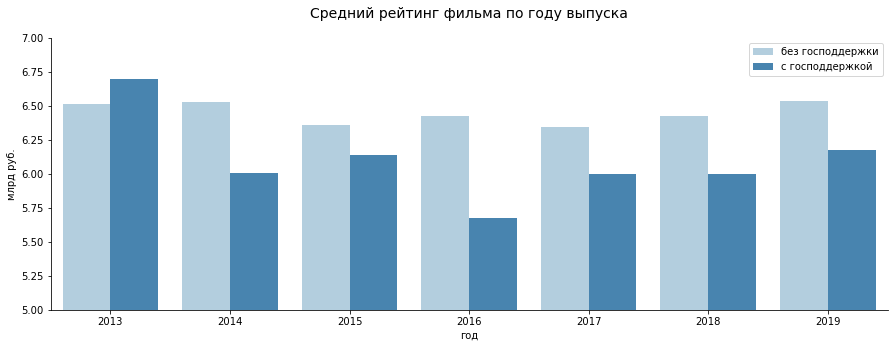

In [139]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x='year_release', y='ratings', hue='is_funded', 
                 data=df[(df['year_release'] >= 2013) & (df['year_release'] <= 2019)], palette='Blues', ci=None)
plt.title('Средний рейтинг фильма по году выпуска', fontsize=14, pad=20)  
plt.xlabel('год')
plt.ylabel('млрд руб.')
ax.set_ylim([5, 7])
plt.legend(loc=1)
sns.despine()

Средний рейтинг фильмов без господержки почти всегда выше, чем у фильмов с господдержкой.

Проанализирем, на какие жанры чаще всего выделялась господдержка:

In [140]:
report = (
df[(df['is_funded'] == 'с господдержкой') & (df['main_genre'] != 'unknown')].groupby('main_genre')['title'].count()
    .sort_values(ascending=False).reset_index().rename(columns={'title':'количество', 'main_genre':'жанр'})
)

report['доля'] = (report['количество']/report['количество'].sum()).apply(lambda x: '{0:.1f}%'.format(x * 100))
display(report)

,жанр,количество,доля
0,драма,93,29.4%
1,комедия,74,23.4%
2,мультфильм,31,9.8%
3,триллер,15,4.7%
4,мелодрама,15,4.7%
5,фантастика,11,3.5%
6,фэнтези,11,3.5%
7,ужасы,10,3.2%
8,военный,9,2.8%
9,приключения,7,2.2%


Чаще всего господдержка выделялась на фильмы в жанрах "Драма" и "Комедия".


## Общий вывод

В рамках данного исследования был проанализирован рынок российского кинопроката. В процессе предобработки данных были изменены типы данных, категориальные переменные приведены к единому стилю. 

В среднем в год выходило в прокат около 800 фильмов. В большинстве случаев, доля господдержки в общем бюджете соствляет около 60%. Минимальные сборы были зафиксированы в 2014 г., а максимальные в 2018 г. Больше всего в прокате собрали фильмы для возрастной аудитории «16+». Также было проведено сравнение рейтингов фильмов с господдержкой и без. Фильмы без господдержки имеют былее высокий рейтнг. В среднем только каждый 5-й фильм с господдержкой окупается. Самые высокие рейтинги наблюдаются у жанров фильм-нуар и аниме. Большинство фильмов из топ-10 с самыми высокими и самыми низкими рейтингами были сняты в России.